# Statistische Methoden für Umformtechniker

------------

Max Weiner

IMF-Kolloquium, 2022-11-01

## Inhalt

1. Motivation
2. Werkzeuge
3. Histogramme, Kennwerte, Verteilungen
4. Regression
5. Zusammenfassung

## Motivation

- schlechte/unpassende Ausbildung im Studium
- vebreitete Abneigung gegen das Thema
- Unwissenheit gefährlich
- aber: gewisse Grundkenntnisse im Ingenieursalltag äußerst nützlich

## Werkzeuge

1. **kein** Excel
2. Python
3. `numpy` - Vektoren, Matrizen, Listen
4. `scipy` - Interpolation, Optimierung, ...
5. `pandas` - Statistik
6. `matplotlib` - Plots

## Histogramme, Kennwerte, Verteilungen

### Laden von Daten mit `pandas`

`pandas` enthält viele Funktionen zum Einlesen gängiger Datenformate, z.B. CSV

In [1]:
import pandas as pd

data = pd.read_csv("pauses.csv", header=0)
data

,duration
0,5.955
1,4.509
2,5.556
3,5.552
4,4.636
...,...
77,4.661
78,4.238
79,5.211
80,5.495


In [2]:
series = data["duration"] # Auswahl einer Spalte

### Plot eines Histogramms mit `matplotlib`

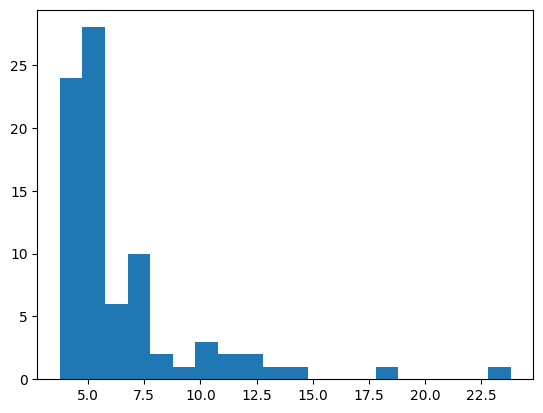

In [3]:
import matplotlib.pyplot as plt

plt.hist(series, bins=20)
plt.show()

### Berechnung von Kennwerten der Datenreihe

In [4]:
series.mean() # Mittelwert

6.505670731707317

In [5]:
series.std() # Standardabweichung

3.310100815498286

In [6]:
series.skew() # Schiefe

2.8879467395305483

### Modellierung der Daten durch eine Normalverteilung

- Normalverteilungen sind der am weitesten verbreitete Ansatz zur Beschreibung von Daten
- In Natur und Technik treten häufig annähernd normalverteilte Daten auf

In [7]:
from scipy import stats

norm = stats.norm(loc=series.mean(), scale=series.std())

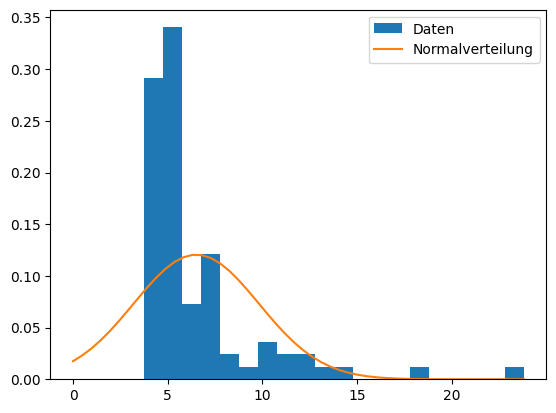

In [8]:
import numpy as np

x = np.linspace(0, series.max(), 50)
plt.hist(series, bins=20, density=True, label="Daten")
plt.plot(x, norm.pdf(x), label = "Normalverteilung")
plt.legend(); plt.show()

### Passt die Normalverteilung auf meine Daten?

- in Statistikvorlesungen werden häufig Normalitätstests gelehrt
    
> Normalitätstest haben zwei mögliche Aussagen: 1) ich habe zu wenig Daten 2) meine Daten sind nicht Normalverteilt. *Allan Downey*

- Frage ist **nicht**: Sind meine Daten normalverteilt?
- **Sondern**: Ist die Normalverteilung eine ausreichende Näherung an meine Daten?

$\rightarrow$ genaue Aussagen schwierig, aber einfache Daumenregeln!

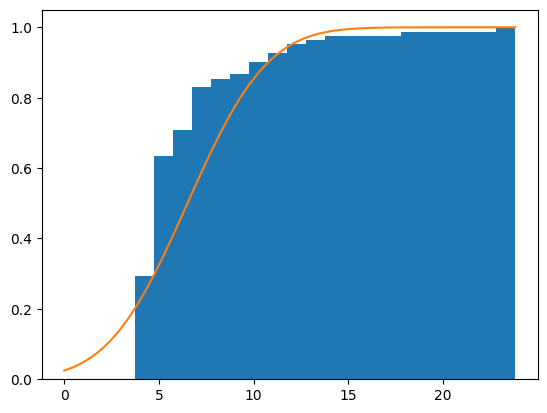

In [9]:
plt.hist(series, bins=20, cumulative=True, density=True, label="Daten")
plt.plot(x, norm.cdf(x), label="Normalverteilung")
plt.show()

### Exponentialverteilung

Zerfallsprozesse, Lebensdauern.

### Gamma-Verteilung

Verallgemeinerte Exponentialverteilung.

$$ k = \frac{\mu^2}{\sigma^2} \quad \theta = \frac{\sigma^2}{\mu} $$

### Lognormalverteilung

Für Daten, deren Logarithmus normalverteilt ist.

### Beta-Verteilung

Für Daten mit Definitionsbereich $[0, 1]$ oder darauf skalierbarem.

$$ \alpha = \mu \left[ \frac{\mu (1 - \mu)}{\sigma^2} - 1 \right] \quad \beta = (1-\mu) \left[ \frac{\mu (1 - \mu)}{\sigma^2} - 1 \right] $$

In [10]:
k = series.mean()**2/series.std()**2; print("k =", k)
theta = series.std()**2/series.mean(); print("θ =", theta)

gamma = stats.gamma(a=k, scale=theta)

k = 3.862795484327411
θ = 1.6841872053808935


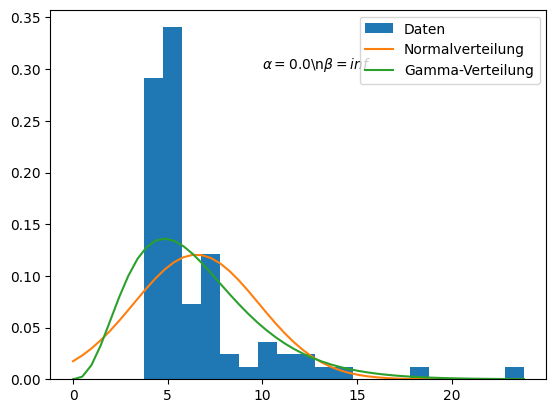

In [11]:
plt.hist(series, bins=20, density=True, label="Daten")
plt.plot(x, norm.pdf(x), label="Normalverteilung")
plt.plot(x, gamma.pdf(x), label="Gamma-Verteilung")
plt.text(10, 0.3, rf"$\alpha = {gamma.a}$\n$\beta = {gamma.b}$")
plt.legend(); plt.show()

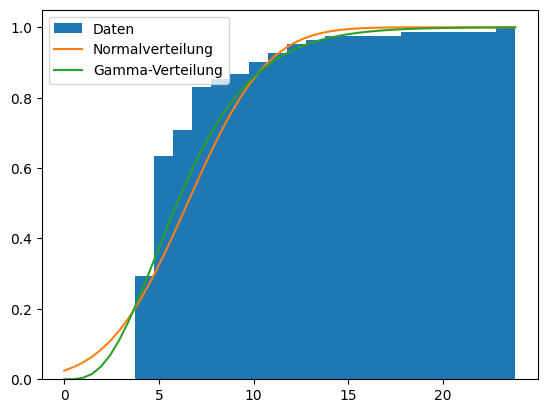

In [12]:
plt.hist(series, bins=20, cumulative=True, density=True, label="Daten")
plt.plot(x, norm.cdf(x), label="Normalverteilung")
plt.plot(x, gamma.cdf(x), label="Gamma-Verteilung")
plt.legend(); plt.show()

- Auffällig: keine Datenpunkte unterhalb von ca. 3.74 s
- Zeit benötigt zum Zustellen des Walzspaltes
- Berücksichtigung solcher Auffälligkeiten kann Modell der Verteilung stark verbessern.

$\rightarrow$ Prozesskentniss zur Interpretation der Daten notwendig!

In [13]:
series2 = series - series.min()

k2 = series2.mean()**2/series2.std()**2; print("k2 =", k2, "\tk =", k)
theta2 = series2.std()**2/series2.mean(); print("θ2 =", theta2, "\tθ =", theta)

gamma2 = stats.gamma(a=k2, scale=theta2)

k2 = 0.6945720322485311 	k = 3.862795484327411
θ2 = 3.9717561370513295 	θ = 1.6841872053808935


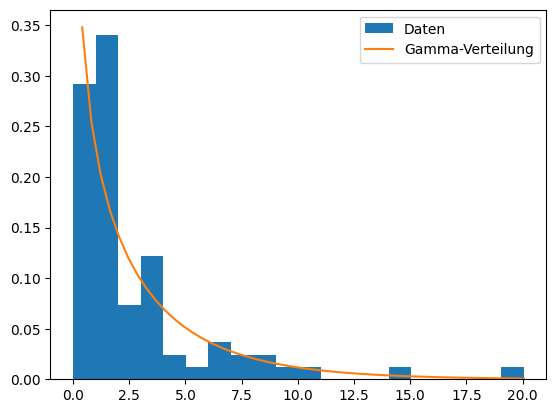

In [14]:
x2 = np.linspace(0, series2.max(), 50)
plt.hist(series2, bins=20, density=True, label="Daten")
plt.plot(x2, gamma2.pdf(x2), label="Gamma-Verteilung")
plt.legend(); plt.show()

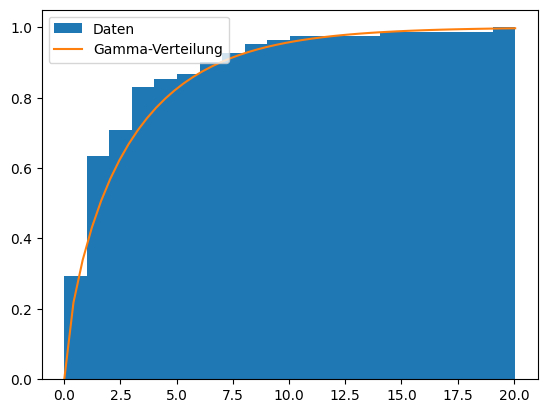

In [15]:
plt.hist(series2, bins=20, cumulative=True, density=True, label="Daten")
plt.plot(x2, gamma2.cdf(x2), label="Gamma-Verteilung")
plt.legend(); plt.show()

## Regression



In [16]:
fk_data = pd.read_csv("fließkurve_bst.csv")

In [17]:
fk_data

,Umformgrad N,Fließspannung MW : BST_800_01a.txt 800 [C]; 0.10[-],Umformgrad N.1,Fließspannung MW : BST_800_01b.txt 800 [C]; 0.10[-],Umformgrad N.2,Fließspannung MW : BST_800_1a.txt 800 [C]; 1.00[-],Umformgrad N.3,Fließspannung MW : BST_800_1a_00.txt 800 [C]; 1.00[-],Umformgrad N.4,Fließspannung MW : BST_800_10a.txt 800 [C]; 10.00[-],...,Umformgrad N.85,Temp : BST_1200_1b.txt 1200 [C]; 1.00[-],Umformgrad N.86,Temp : BST_1200_10b.txt 1200 [C]; 10.00[-],Umformgrad N.87,Temp : BST_1200_10a.txt 1200 [C]; 10.00[-],Umformgrad N.88,Temp : BST_1100_01a.txt 1100 [C]; 0.10[-],Umformgrad N.89,Temp : BST_1100_01b.txt 1100 [C]; 0.10[-]
0,0.000000,50.501127,0.000000,50.162090,0.000000,59.690773,0.000000,60.935562,0.000000,87.485148,...,0.000000,1200.0,0.000000,1200.0,0.000000,1200.0,0.000000,1100.0,0.000000,1100.0
1,0.000852,52.675668,0.000761,52.282859,0.000759,62.515377,0.000644,63.791803,0.001074,90.791785,...,0.000136,1200.0,0.000878,1200.0,0.000715,1200.0,0.000665,1100.0,0.001264,1100.0
2,0.001716,54.850114,0.001522,54.403668,0.001524,65.339961,0.001308,66.647785,0.002255,94.095824,...,0.000506,1200.0,0.001781,1200.0,0.001434,1200.0,0.001330,1100.0,0.002564,1100.0
3,0.002588,57.024493,0.002397,56.523232,0.002534,68.160757,0.002392,69.497209,0.004075,97.383491,...,0.000951,1200.0,0.002684,1200.0,0.002153,1200.0,0.002064,1100.0,0.003879,1100.0
4,0.003571,59.197453,0.003273,58.642824,0.003544,70.981668,0.003476,72.346763,0.005894,100.671540,...,0.001396,1200.0,0.003601,1200.0,0.002838,1200.0,0.002797,1100.0,0.005208,1100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
